# Redes Neuronales - Trabajo Práctico N° 2 - Ejercicio 2
# Notebook #3: Experimento sobre outliers de salida 

## Integrantes del grupo
* Gaytan, Joaquín Oscar
* Kammann, Lucas Agustín

# Fuentes

### Link: https://www.neuraldesigner.com/blog/3_methods_to_deal_with_outliers
Artículos sobre los **outliers**.

# 1. Cargando base de datos

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
import importlib

In [4]:
import sys

In [5]:
sys.path.insert(0, '../..')

In [6]:
# Read the database from the .csv file into a pandas dataframe
df = pd.read_csv('../../databases/insurance.csv')

# 2. Preprocesamiento de los datos

In [7]:
from sklearn import preprocessing

In [22]:
from src import helper
importlib.reload(helper);

## 2.1. Codificación de variables no numéricas

In [9]:
# Create a label encoder for the sex variable or feature and create a new column in the dataframe 
# with the encoded version of the gender
sex_encoder = preprocessing.LabelEncoder()
sex_encoder.fit(df['sex'])
df['sex-encoded'] = sex_encoder.transform(df['sex'])

In [10]:
# Create a label encoder for the smoker variable or feature and create a new column in the dataframe
# with the encoded version of the smoker
smoker_encoder = preprocessing.LabelEncoder()
smoker_encoder.fit(df['smoker'])
df['smoker-encoded'] = smoker_encoder.transform(df['smoker'])

In [11]:
# Create a one hot encoder and fit the available types of regions in the dataset
region_encoder = preprocessing.OneHotEncoder()
region_encoder.fit(df['region'].to_numpy().reshape(-1, 1))

# Transform all entries into the one hot encoded representation
encoded_regions = region_encoder.transform(df['region'].to_numpy().reshape(-1, 1)).toarray()

# Add each new encoded variable or feature to the dataset
for i, category in enumerate(region_encoder.categories_[0]):
    df[f'{category}-encoded'] = encoded_regions.transpose()[i]

## 2.2. Eliminando outliers
A partir del análisis realizado sobre la base de datos sobre la cual se entrenan los modelos, se detectaron outliers en la variable del índice de masa corporal, se decide remover estos datos por completo ya que no fue necesario tener en cuenta una estrategia para corregir datos incompletos o incorrectos y el impacto que tiene sobre la totalidad de datos es menos del 1%. Entonces, se eliminan los casos con outliers del BMI.

In [12]:
# Remove outliers by setting NaN on those rows at the column of BMI
helper.remove_outliers(df, 'bmi')
helper.remove_outliers(df, 'charges')

# Remove NaN values from the dataframe
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1193 non-null   int64  
 1   sex                1193 non-null   object 
 2   bmi                1193 non-null   float64
 3   children           1193 non-null   int64  
 4   smoker             1193 non-null   object 
 5   region             1193 non-null   object 
 6   charges            1193 non-null   float64
 7   sex-encoded        1193 non-null   int32  
 8   smoker-encoded     1193 non-null   int32  
 9   northeast-encoded  1193 non-null   float64
 10  northwest-encoded  1193 non-null   float64
 11  southeast-encoded  1193 non-null   float64
 12  southwest-encoded  1193 non-null   float64
dtypes: float64(6), int32(2), int64(2), object(3)
memory usage: 121.2+ KB


## 2.2. Filtrado de variables

In [15]:
# Filtering or removing of non desired variables
df_x = df[['age', 'bmi', 'smoker-encoded', 'children', 'sex-encoded', 'northwest-encoded', 'northeast-encoded', 'southwest-encoded', 'southeast-encoded']]
df_y = df['charges']

# 3. Separación del conjunto de entrenamiento y evaluación

In [16]:
from sklearn import model_selection

In [17]:
from sklearn import preprocessing

## 3.1. Separación de los conjuntos
Se realiza la separación del conjunto de datos original en **train**, **valid** y **test**.

In [18]:
# Split the dataset into train_valid and test
x_train_valid, x_test, y_train_valid, y_test = model_selection.train_test_split(df_x, df_y, test_size=0.2, random_state=5, shuffle=True)

In [19]:
# Split the dataset into train and valid
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=15, shuffle=True)

# 4. Regresión Lineal

In [20]:
from src.ej2 import rl_helper
importlib.reload(rl_helper);

## 4.1. Experimentos, análisis y observaciones

In [19]:
# Run model experiment
mae_train, mae_valid, mae_test = rl_helper.run_model(x_train, y_train, x_valid, y_valid, x_test, y_test,
                                                     learning_rate=1000,
                                                     degree=2,
                                                     scheduler='exponential-decay',
                                                     decay_rate=0.09,
                                                     optimizer='adam',
                                                     beta_1=0.9,
                                                     beta_2=0.99,
                                                     patience=50,
                                                     min_delta=10,
                                                     epochs=1000,
                                                     batch_size=64,
                                                     tag='outliers/experiment-1'
                                                    )

Model logs at tb-logs/rl/outliers/experiment-1/20210531-161557
Model checkpoints at checkpoints/rl/outliers/experiment-1/20210531-161557
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 55        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
[MAE] Train: 1274.89 Valid: 1807.78 Test: 1287.49


In [20]:
# Run model experiment
mae_train, mae_valid, mae_test = rl_helper.run_model(x_train, y_train, x_valid, y_valid, x_test, y_test,
                                                     learning_rate=1000,
                                                     degree=3,
                                                     scheduler='exponential-decay',
                                                     decay_rate=0.09,
                                                     optimizer='adam',
                                                     beta_1=0.9,
                                                     beta_2=0.99,
                                                     patience=50,
                                                     min_delta=10,
                                                     epochs=1000,
                                                     batch_size=64,
                                                     tag='outliers/experiment-2'
                                                    )

Model logs at tb-logs/rl/outliers/experiment-2/20210531-161829
Model checkpoints at checkpoints/rl/outliers/experiment-2/20210531-161829
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 220       
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
[MAE] Train: 1330.9 Valid: 1960.79 Test: 1393.22


In [21]:
# Run model experiment
mae_train, mae_valid, mae_test = rl_helper.run_model(x_train, y_train, x_valid, y_valid, x_test, y_test,
                                                     learning_rate=1000,
                                                     degree=4,
                                                     scheduler='exponential-decay',
                                                     decay_rate=0.09,
                                                     optimizer='adam',
                                                     beta_1=0.9,
                                                     beta_2=0.99,
                                                     patience=50,
                                                     min_delta=10,
                                                     epochs=1000,
                                                     batch_size=64,
                                                     tag='outliers/experiment-3'
                                                    )

Model logs at tb-logs/rl/outliers/experiment-3/20210531-162055
Model checkpoints at checkpoints/rl/outliers/experiment-3/20210531-162055
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 715       
Total params: 715
Trainable params: 715
Non-trainable params: 0
_________________________________________________________________
[MAE] Train: 1389.16 Valid: 2102.64 Test: 1560.98


In [22]:
# Run model experiment
mae_train, mae_valid, mae_test = rl_helper.run_model(x_train, y_train, x_valid, y_valid, x_test, y_test,
                                                     learning_rate=1000,
                                                     degree=2,
                                                     scheduler='exponential-decay',
                                                     decay_rate=0.09,
                                                     loss='mse',
                                                     optimizer='adam',
                                                     beta_1=0.9,
                                                     beta_2=0.99,
                                                     patience=50,
                                                     min_delta=10,
                                                     epochs=1000,
                                                     batch_size=64,
                                                     tag='outliers/experiment-4'
                                                    )

Model logs at tb-logs/rl/outliers/experiment-4/20210531-162355
Model checkpoints at checkpoints/rl/outliers/experiment-4/20210531-162355
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 55        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
[MAE] Train: 17087004.0 Valid: 25829874.0 Test: 18361222.0


## 4.2. Usando K-Folding

In [21]:
# Run model experiment
train_maes, valid_maes, test_maes = rl_helper.run_model_with_kfold(df_x, df_y, test_size=0.2, n_splits=8, random_state=20,
                                                                learning_rate=1000,
                                                                degree=2,
                                                                scheduler='exponential-decay',
                                                                decay_rate=0.09,
                                                                optimizer='adam',
                                                                beta_1=0.9,
                                                                beta_2=0.99,
                                                                patience=50,
                                                                min_delta=10,
                                                                epochs=1000,
                                                                batch_size=64,
                                                                tag='outliers/kfold',
                                                                tensorboard_on=False,
                                                                summary_on=False
                                                               )

# Inform results
mae_train = round(train_maes.mean(), 2)
mae_valid = round(valid_maes.mean(), 2)
mae_test = round(test_maes.mean(), 2)
print(f'[MAE] Train: {mae_train} Valid: {mae_valid} Test: {mae_test}')

[MAE] Train: 1275.95 Valid: 1275.3 Test: 1709.64


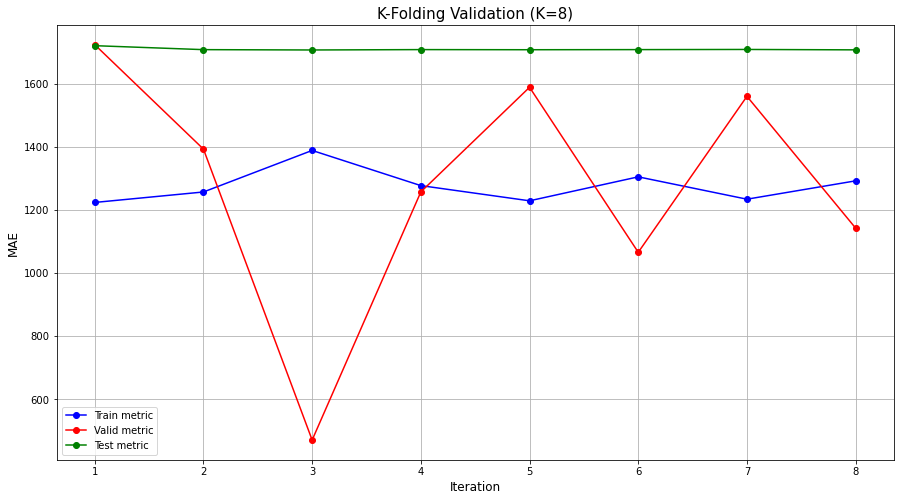

In [23]:
helper.plot_kfold_metrics(train_maes, valid_maes, test_maes)

# Conclusión
El objetivo de este análisis fue responder, **¿se pueden remover outliers de la salida?**, o al menos tratar de discernir el impacto que estos tienen sobre cómo entrenamos el modelo. Particularmente, al remover los outliers de la variable de salida se redujo las diferencias de la performance del modelo entre diferentes conjuntos, y además se mejoró la métrica en general. Esto tiene sentido, el modelo debe ser capaz de adaptarse acorde a la función de costo sobre el conjunto de entrenamiento, y cuando se presentan outliers, se hace más dificil ajustarse bien a todos los datos. Además, siempre y cuando no sean suficientes datos sucederá que no hay información suficiente para ajustarse bien a los outliers. Por otro lado, como desventaja, al remover esos datos **¿qué pasa si queremos predecirlos?**.

En otro sentido, **¿cuál es el dominio que el modelo debe interpolar?**, podría interpretarse la presencia de outliers como datos o información por fuera de lo común y por ende por fuera de un dominio sobre el cuál tiene sentido que el modelo prediga. En ese caso, también se podría preguntar si es mejor que el modelo ajuste mejor sobre los datos que cumplen con una distribución usual, por sobre gastar recursos de entrenamiento incluyendo esos outliers, dado que uno podría pensar que es preferible dar una predicción dentro de un rango pero con buena precisión.

Ademas, resulta interesante observar que se puede ver claramente la diferencia entre la **varianza** de los estimadores de la métrica sobre diferentes conjuntos, particularmente en **validation** donde se tienen menos muestras, se tiene una mayor varianza.